# Information Retrieval Exercise 2 Notebook


This is the template notebook for Exercise 2. The specification for the exercise and the corresponding Exercise 2 Quiz submission instance are available on the Moodle page of the course.

This exercise builds upon Exercise 1, and assumes that you are now familiar with concepts we have introduced in both the Warmup Exercise and Exercise 1, including:
 - [PyTerrier operators](https://pyterrier.readthedocs.io/en/latest/operators.html)
 - [Pyterrier apply transformers](https://pyterrier.readthedocs.io/en/latest/transformer.html)
 - [PyTerrier pt.Experiment()](https://pyterrier.readthedocs.io/en/latest/experiments.html)


## PyTerrier Setup

First, let's install PyTerrier as usual.

In [ ]:
%pip install -q python-terrier lightgbm==2.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

Let's start PyTerrier:

In [ ]:
import pyterrier as pt
if not pt.started():
  pt.init()

# we require a specific version of LightGBM for this exercise
import lightgbm
assert lightgbm.__version__ == '2.2.3'

terrier-assemblies 5.7 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.7 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



## Index, Topics & Qrels for Exercise 2

You will need your login & password credentials from Exercise 1. We will be using again the "50pct" and the "trec-wt-2004" datasets from Exercise 1.


In [ ]:
UNAME="2850756t"
PWORD="799cb19a"

# we will again be using the "50pct" and "trec-wt-2004" datasets
Fiftypct = pt.get_dataset("50pct",  user=UNAME, password=PWORD)
dotgov_topicsqrels = pt.get_dataset("trec-wt-2004")

On the other hand, you will be using a slightly updated index for Exercise 2. It is a bit bigger than the Exercise 1 index, hence it takes about 2-3 minutes to download to Colab.


In [ ]:

indexref = Fiftypct.get_index(variant="ex3")
index = pt.IndexFactory.of(indexref)


data.meta-0.fsomapfile:   0%|          | 0.00/50.1M [00:00<?, ?iB/s]

data-pagerank.oos:   0%|          | 0.00/9.52M [00:00<?, ?iB/s]

data.direct.bf:   0%|          | 0.00/374M [00:00<?, ?iB/s]

data.document.fsarrayfile:   0%|          | 0.00/19.3M [00:00<?, ?iB/s]

data.inverted.bf:   0%|          | 0.00/384M [00:00<?, ?iB/s]

data.lexicon.fsomapfile:   0%|          | 0.00/183M [00:00<?, ?iB/s]

data.lexicon.fsomaphash:   0%|          | 0.00/0.99k [00:00<?, ?iB/s]

data.lexicon.fsomapid:   0%|          | 0.00/7.80M [00:00<?, ?iB/s]

data.meta.idx:   0%|          | 0.00/6.16M [00:00<?, ?iB/s]

data.meta.zdata:   0%|          | 0.00/861M [00:00<?, ?iB/s]

data.properties:   0%|          | 0.00/4.35k [00:00<?, ?iB/s]

14:02:33.049 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 860.9 MiB of memory would be required.


Let's check out the new index. Compared to the index we used for Exercise 1, you can see that this index has `Field Names: [TITLE, ELSE]`, which means that we can provide statistics about how many times each term occurs in the title of each document (the "TITLE" field), vs the rest of the document (the "ELSE" field). Refer to Lecture 8 for more information about fields.

Let's also display the keys in the meta index - this is the metadata that we have stored for each document. You can see that we are storing the "url" and the "body" (content) of the document. These will particularly come in handy for Q2 and Q3 of Exercise 2, respectively.


In [ ]:
print(index.getCollectionStatistics())
print("In the meta index: " + str(index.getMetaIndex().getKeys()))

Number of documents: 807775
Number of terms: 2043788
Number of postings: 177737957
Number of fields: 2
Number of tokens: 572916194
Field names: [TITLE, ELSE]
Positions:   false

In the meta index: ['docno', 'url', 'title', 'body']


Finally, these are all of the topics and qrels (including the training and validation datasets) that you will need to conduct Exercise 2.

In [ ]:
tr_topics = Fiftypct.get_topics("training")
va_topics = Fiftypct.get_topics("validation")

tr_qrels = Fiftypct.get_qrels("training")
va_qrels = Fiftypct.get_qrels("validation")

test_topics = dotgov_topicsqrels.get_topics("hp")
test_qrels = dotgov_topicsqrels.get_qrels("hp")

training.topics:   0%|          | 0.00/7.75k [00:00<?, ?iB/s]

validation.topics:   0%|          | 0.00/4.39k [00:00<?, ?iB/s]

training.qrels:   0%|          | 0.00/2.88k [00:00<?, ?iB/s]

validation.qrels:   0%|          | 0.00/1.48k [00:00<?, ?iB/s]

Web2004.query.stream.trecformat.txt:   0%|          | 0.00/15.3k [00:00<?, ?iB/s]

04.topic-map.official.txt:   0%|          | 0.00/2.53k [00:00<?, ?iB/s]

04.qrels.web.mixed.txt:   0%|          | 0.00/1.90M [00:00<?, ?iB/s]

## Baseline Setup

We introduce here the BatchRetrieve for our baseline. Note that:
 - We are using PL2 as our weighting model to generate the candidate set of documents to re-rank.
 - We expose more document metadata, namely "url" and "body" for each document retrieved, which you will need to deploy your two new features.
 - By setting `verbose=True`, we display a progress bar while retrieval executes.

In [ ]:
firstpassUB = pt.BatchRetrieve(index, wmodel="PL2", metadata=["docno", "url", "body"], verbose=True)


Let's see the resulting output - you can see that there are now "url" and "body" attributes for each retrieved document. (We also display a progress bar, enabled by the `verbose=True`).

In [ ]:
firstpassUB.search("chemical reactions")

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

,qid,docid,docno,url,body,rank,score,query
0,1,513586,G18-38-1767991,http://www.boulder.nist.gov/div838/tar/file03....,NIST - Physical and Chemical Properties Divi...,0,12.755546,chemical reactions
1,1,38544,G01-14-2537005,http://www.labtrain.noaa.gov/shemtfa/chemhaz/n...,. ...,1,11.906524,chemical reactions
2,1,707122,G26-06-3754605,http://www.aps.anl.gov/xfd/tech/safetyenvelope...,APS Experiment Safety Envelope 6: Chemicals ...,2,11.877550,chemical reactions
3,1,382754,G13-59-3981168,http://response.restoration.noaa.gov/chemaids/...,"""); } else { document.write(...",3,11.858475,chemical reactions
4,1,70292,G02-16-2617043,http://www.symp14.nist.gov/PDF/COR04MAY.PDF,A Database of Chemical Reactions Designed to A...,4,11.731490,chemical reactions
...,...,...,...,...,...,...,...,...
995,1,246965,G08-68-4141101,http://en-env.llnl.gov/asd/pinatub.html,The Chemical and Radiative Effects of the Moun...,995,6.290707,chemical reactions
996,1,611136,G22-04-3955177,http://eospso.gsfc.nasa.gov/ftp_docs/Ch7.pdf,Chapter 7 ...,996,6.289822,chemical reactions
997,1,594957,G21-38-0191596,http://www.oit.doe.gov/news/oittimes/wn02/wn02...,search ...,997,6.287830,chemical reactions
998,1,280944,G09-85-3411646,http://www.ig.doe.gov/pdf/chemfina.pdf,INS-O-00-01 I N S P E C T I O N ...,998,6.287759,chemical reactions


# Standard list of features

Let's introduce the list of features we need to deploy a baseline learning-to-rank approach.

In [ ]:
pagerankfile = indexref + "/data-pagerank.oos"
features = [
    "SAMPLE", #ie PL2
    "WMODEL:SingleFieldModel(BM25,0)", #BM25 title
    "QI:StaticFeature(OIS,%s)" % pagerankfile,
]

stdfeatures = pt.FeaturesBatchRetrieve(index, features, verbose=True)
stage12 = firstpassUB >> stdfeatures

This is our feature set. We will be using FeaturesBatchRetrieve to compute these extra features on the fly. Let's see the output. You can see that there is now a "features" column.

In [ ]:
stage12.search("chemical reactions").head(2)

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

,qid,query,docid,rank,features,docno,score
0,1,chemical reactions,513586,0,"[12.755545561073266, 3.0924078763629836, 0.000...",G18-38-1767991,12.755546
1,1,chemical reactions,38544,1,"[11.90652405775751, 10.789390732195702, 0.0002...",G01-14-2537005,11.906524


Let's look in more detail at the features. It is clear that there are 3 numbers for each document. The first is the PL2 score (1.27555456e+01 == 12.7555), the second is the BM25 score, and the third is the PageRank (a link analysis feature - discussed in more detail in Lecture 10)

In [ ]:
stage12.search("chemical reactions").head(1).iloc[0]["features"]

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

array([1.27555456e+01, 3.09240788e+00, 1.05668333e-04])

# Q1

You now have everyting you need to attempt Q1. You will need to refer to the specification, and to PyTerrier's [learning to rank documentation](https://pyterrier.readthedocs.io/en/latest/ltr.html).

You should use a LightGBM LambdaMART implementation (*not* XGBoost), instantiated using the configuration suggested in the PyTerrier documentation.

Hints:
 - You will need to use the provided separate “training” and “validation” topic sets and qrels to train the learning-to-rank.
 - There is no need to vary the configuration of LightGBM from that in the documentation.

In [ ]:
# Import LightGBM
import lightgbm as lgb
# Configure LightGBM and LambdaMART
lmart_l = lgb.LGBMRanker(task="train",
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=100,
    max_bin=255,
    num_leaves=7,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[1, 3, 5, 10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=10)

# Define the pipeline which first ranks by PL2 and then reranks using LTR
lmart_pipe = stage12 >> pt.ltr.apply_learned_model(lmart_l, form='ltr')
# Fit the pipeline to the training and validation data
lmart_pipe.fit(tr_topics, tr_qrels, va_topics, va_qrels)

BR(PL2):   0%|          | 0/96 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/96 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/54 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/54 [00:00<?, ?q/s]

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's ndcg@1: 0.148148
[2]	valid_0's ndcg@1: 0.203704
[3]	valid_0's ndcg@1: 0.333333
[4]	valid_0's ndcg@1: 0.351852
[5]	valid_0's ndcg@1: 0.37037
[6]	valid_0's ndcg@1: 0.37037
[7]	valid_0's ndcg@1: 0.388889
[8]	valid_0's ndcg@1: 0.407407
[9]	valid_0's ndcg@1: 0.425926
[10]	valid_0's ndcg@1: 0.425926


Compare PL2 vs. LTR

In [ ]:
# Define experiment which compares LTR to the PL2 baseline using MAP
pt.Experiment([stage12, lmart_pipe], # PL2 & LTR pipeline
              test_topics,      # hp topic set
              test_qrels,     # hp qrels
              ["map"],          # use map
              round={"map" : 4},    # round to 4
              names=["PL2 Baseline", "LambdaMART (LightGBM)"],
              baseline=0)   # baseline is index 0, PL2

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,PL2 Baseline,0.2251,NaN,NaN,NaN
1,LambdaMART (LightGBM),0.3579,44.0,18.0,0.007377


In [ ]:
# Define experiment which compares LTR to the PL2 baseline using P@5
pt.Experiment([stage12, lmart_pipe],
              test_topics,
              test_qrels,
              ["P_5"],        # note: using P@5 this time
              round={"P_5" : 4},
              names=["PL2 Baseline", "LambdaMART (LightGBM)"],
              baseline=0)

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,PL2 Baseline,0.0693,NaN,NaN,NaN
1,LambdaMART (LightGBM),0.1013,18.0,7.0,0.02231


# Q2 - URL Length Features

In this block, please provide your code for Q2 concerning your two URL Length features, namely URL Length by counting slashes (URL-slashes) and URL Length through using the type of the URL (URL-type). The two different URL length features that you will need to implement are detailed in the specification. Do carefully read and follow the Exercise 2 specification before starting the implementation of the features.

Some hints:

 - You will need to use a [pt.apply function](https://pyterrier.readthedocs.io/en/latest/apply.html) for computing your URL feature(s). The dataframe of results obtained from the `stage12` transformer has all of the information you need.

 - You can use a `**` operator for combining feature sets.

 - Refer to the PyTerrier learning to rank documentation  concerning `feature_importances_` for obtaining feature importances.

 - You may wish to refer to Python's [`urlparse()`](https://docs.python.org/3/library/urllib.parse.html) function.

 - Use Python assertions to test that your feature implmentation(s) give the expected results.


## Q2 (a) URL-Slashes Feature

In this block you should define your URL-Slashes feature, and test it. Show clearly the tests you have conducted to test that your feature works as expected.

In [ ]:
# Import numpy since pt.apply.doc_features returns a 1D numpy array
import numpy as np

# Define the URL Slashes feature function
# Parameters: row -> the row of the dataframe
def url_slashes(row):
  # Save the docid of the current row in the dataframe
  docid = row["docid"]
  # Save the URL from the meta index
  url = index.getMetaIndex().getItem("url", docid)
  # Use URL parse to count the number of slashes
  count = url.count('/')
  # Return the number of slashes in 1D numpy array
  return np.array([count])

#### Tests to see that URL slashes works correctly ####

# Assert docid 596532 w/ URL = http://erp-web.er.usgs.gov/reports/annsum/vol39/pt/g3078.htm
# returns seven slashes
assert url_slashes(stage12.search("trigger data").iloc[0]) == 7, "URL Slashes should be 7"

# Assert docid 576995 w/ URL = http://connery.star.bnl.gov/STAR/html/interfaces_l/interfaces.html
# returns six slashes
assert url_slashes(stage12.search("trigger data").iloc[50]) == 6, "URL Slashes should be 6"

# Assert that docid 394043 w/ URL = http://www-focus.fnal.gov/focus_spect_port_logo2.ps
# returns three slashes
assert url_slashes(stage12.search("trigger data").iloc[250]) == 3, "URL Slashes should be 3"

# Assert that docid 82733 w/ URL = http://www-cdf.lbl.gov/cdf_svx/cdf_svx.html
# returns four slashes
assert url_slashes(stage12.search("trigger data").iloc[400]) == 4, "URL Slashes should be 4"


BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

#### (i) URL-Slashes as a PL2 re-ranker

Now you should evaluate your URL-slashes score by re-ranking PL2, without applying learning-to-rank. You can now answer the corresponding quiz questions.

In [ ]:
# Define the URL Slashes pipeline which first ranks by PL2 and then reranks by URL_slashes
url_slash_pipe = stage12 >> pt.apply.doc_score(lambda row: url_slashes(row))

Look at the top Docno for the query 'cryption'.

In [ ]:
url_slash_pipe.search('cryption')

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

,qid,query,docid,features,docno,score,rank
1,1,cryption,494954,"[5.182290373307019, 0.0, 9.15713582850406e-05]",G17-68-2584616,7.0,0
0,1,cryption,434993,"[8.382679285265109, 0.0, 2.305785366992208e-06]",G15-50-1054100,6.0,1
6,1,cryption,457024,"[3.670543267399117, 0.0, 2.641030205601292e-06]",G16-34-3764782,6.0,2
7,1,cryption,424551,"[1.5301883918013721, 0.0, 2.305785366992208e-06]",G15-11-3633588,6.0,3
8,1,cryption,427549,"[1.341453890700169, 0.0, 5.104254074925701e-06]",G15-22-3805523,6.0,4
3,1,cryption,418765,"[4.695244111620907, 0.0, 6.973038202990883e-07]",G14-90-3191980,5.0,5
5,1,cryption,88187,"[3.7169630306529493, 0.0, 7.061899539884059e-06]",G02-78-3621877,5.0,6
9,1,cryption,567214,"[1.2993750806801825, 0.0, 1.7674539208001e-06]",G20-36-0506919,5.0,7
2,1,cryption,515873,"[5.0291553625933085, 0.0, 3.0832175984918763e-06]",G18-46-1865362,4.0,8
4,1,cryption,580563,"[4.3304069307091515, 0.0, 1.1726886165055974e-05]",G20-84-2477732,4.0,9


In [ ]:
# Run the experiment of PL2 vs. URL-slashes reranking evaluating MAP
pt.Experiment([stage12, url_slash_pipe],
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["PL2 Baseline", "URL Slash Reranking"],
              baseline=0)   # Baseline is PL2

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,PL2 Baseline,0.2251,NaN,NaN,NaN
1,URL Slash Reranking,0.0022,0.0,70.0,3.386940e-08


In [ ]:
# Run experiment of PL2 vs. URL-slashes reranking evaluating P@5
pt.Experiment([stage12, url_slash_pipe],
              test_topics,
              test_qrels,
              ["P_5"],        # Note: Using P@5 here
              round={"P_5" : 4},
              names=["PL2 Baseline", "URL Slash Reranking"],
              baseline=0)

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,PL2 Baseline,0.0693,NaN,NaN,NaN
1,URL Slash Reranking,0.0000,0.0,26.0,2.216676e-08


#### (ii) URL-Slashes within an LTR model

Now you should evaluate your URL-slashes score as a feature within a new learned model. You can now answer the corresponding quiz questions.

In [ ]:
# Define a new LambdaMART variable, distinguished from the first one
lmart_l2 = lgb.LGBMRanker(task="train",
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=100,
    max_bin=255,
    num_leaves=7,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[1, 3, 5, 10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=10)

# Define the LTR + URL Slashes Pipeline
# This pipeline first takes the firstpassUB then applies the stdfeatures combined with the
# URL Slashes feature, the LTR model is then applied
url_slash_lm_pipe = firstpassUB >> (stdfeatures ** pt.apply.doc_features(url_slashes)) >> pt.ltr.apply_learned_model(lmart_l2, form='ltr')
# Fit the LTR + URL Slashes pipeline to the training and validation data
url_slash_lm_pipe.fit(tr_topics, tr_qrels, va_topics, va_qrels)

BR(PL2):   0%|          | 0/96 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/96 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/54 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/54 [00:00<?, ?q/s]

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's ndcg@1: 0.166667
[2]	valid_0's ndcg@1: 0.222222
[3]	valid_0's ndcg@1: 0.333333
[4]	valid_0's ndcg@1: 0.333333
[5]	valid_0's ndcg@1: 0.333333
[6]	valid_0's ndcg@1: 0.407407
[7]	valid_0's ndcg@1: 0.462963
[8]	valid_0's ndcg@1: 0.574074
[9]	valid_0's ndcg@1: 0.592593
[10]	valid_0's ndcg@1: 0.574074


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 4 features (including URL slashes), using MAP
pt.Experiment([lmart_pipe, url_slash_lm_pipe], # Baseline LTR , LTR + URL Slashes
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (3 Features)", "LTR (+ URL Slashes)"],
              baseline=0)     # Note the baseline is LTR w/ 3 features

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,PL2 Baseline,0.3579,NaN,NaN,NaN
1,URL Slash Reranking,0.4296,26.0,19.0,0.048966


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 4 features (including URL slashes), using P_5
pt.Experiment([lmart_pipe, url_slash_lm_pipe],
              test_topics,
              test_qrels,
              ["P_5"],
              round={"P_5" : 4},
              names=["LTR (3 Features)", "LTR (+ URL Slashes)"],
              baseline=0)

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,PL2 Baseline,0.1013,NaN,NaN,NaN
1,URL Slash Reranking,0.1227,10.0,3.0,0.044734


### Feature importances

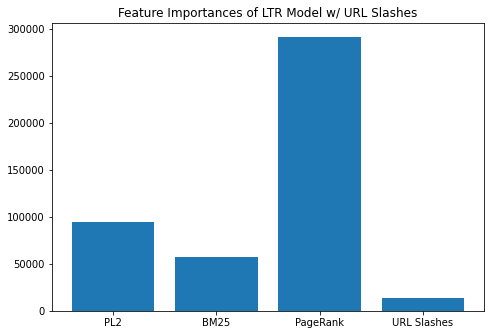

In [ ]:
# Import matplotlib to create barplot of feature importances
import matplotlib.pyplot as plt

# Create bar plot of feature importances
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['PL2', 'BM25', 'PageRank', 'URL Slashes'], lmart_l2.feature_importances_)
ax.set_title("Feature Importances of LTR Model w/ URL Slashes")
fig.show()

## Q2 (b) URL Type Feature

In this block you should define your URL Type feature and test it. Show clearly the tests you have conducted to test that your feature works as expected.

In [ ]:
# Import URL Parse for ease of creating the URL Type feature
from urllib.parse import urlparse

# Define the URL type feature method
# Parameters: row -> the row of the dataframe
def url_type(row):
  # Save the docid of the current row in the dataframe
  docid = row["docid"]
  # Save the URL from the meta index
  url = index.getMetaIndex().getItem("url", docid)
  # Parse the URL
  parsed = urlparse(url)
  # Obtain path list from parsed URL
  path = list(filter(lambda x: x != '', parsed.path.split('/')))

  # Conditionals to decide URL type
  # If the path length is 0 (just a domain) or the path length is 1 and only contains 'index.html'
  if len(path) == 0 or (len(path) == 1 and path[0] == 'index.html'):
    # The type is 1 -> root
    typ = 1
  # If the path length is 1 and it does not contain a '.' (thus is not a filename)
  # OR the path length is 2 and the second element is 'index.html'
  elif (len(path) == 1 and path[0].count('.') == 0) or (len(path) == 2 and path[1] == 'index.html'):
    # The type is 2 -> subroot
    typ = 2
  # If the path length is greater than 1 and the last item is not a filename
  # OR the path length is greater than 1 and the last item is 'index.html'
  # NOTE: The prior conditional will have already caught path length 2 URLs ending in index.html
  elif (len(path) > 1 and path[-1].count('.') == 0) or (len(path) > 1 and path[-1] == 'index.html'):
    # The type is 3 -> path
    typ = 3
  # Anything that was not caught by other conditionals must end in a filename other than 'index.html'
  else:
    # The type is 4 -> file
    typ = 4

  # Return a 1D np array with single element, type of URL
  return np.array([typ])


I have created a separate method for testing (see below).

In [ ]:
# To test the functionality of the url type feature, since I was unable to find a row
# in the dataset for all of my test cases, I have edited the function to take a URL instead.
# NOTE: This function classifies URLs exactly the same why as the other one, it simply takes a URL
# rather than retrieving a URL by docid.
def url_type_test(url):
  # Parse the URL
  parsed = urlparse(url)
  # Obtain path list from parsed URL
  path = list(filter(lambda x: x != '', parsed.path.split('/')))

  # Conditionals to decide URL type
  # If the path length is 0 (just a domain) or the path length is 1 and only contains 'index.html'
  if len(path) == 0 or (len(path) == 1 and path[0] == 'index.html'):
    # The type is 1 -> root
    typ = 1
  # If the path length is 1 and it does not contain a '.' (thus is not a filename)
  # OR the path length is 2 and the second element is 'index.html'
  elif (len(path) == 1 and path[0].count('.') == 0) or (len(path) == 2 and path[1] == 'index.html'):
    # The type is 2 -> subroot
    typ = 2
  # If the path length is greater than 1 and the last item is not a filename
  # OR the path length is greater than 1 and the last item is 'index.html'
  # NOTE: The prior conditional will have already caught path length 2 URLs ending in index.html
  elif (len(path) > 1 and path[-1].count('.') == 0) or (len(path) > 1 and path[-1] == 'index.html'):
    # The type is 3 -> path
    typ = 3
  # Anything that was not caught by other conditionals must end in a filename other than 'index.html'
  else:
    # The type is 4 -> file
    typ = 4

  # Return a 1D np array with single element, type of URL
  return np.array([typ])

####### Testing of the URL type functionality #######

#### Testing of Type 4 ####
# Test that URL not ending in index.html returns Type 4 -> file
assert url_type_test('http://trec.nist.gov/pubs/trec9/t9_proceedings.html') == 4, "Should be of type 4 -> file"


#### Testing of Type 3 ####
# Test that URL with an arbitrary deep path returns Type 3 -> path
assert url_type_test('http://trec.nist.gov/pubs/trec9/') == 3, "Should be of type 3 -> path"
assert url_type_test('http://trec.nist.gov/pubs/trec9/information/retrieval') == 3, "Should be of type 3 -> path"

# Test that URL with arbitrary deep path that ends in index.html return Type 3 -> path
assert url_type_test('http://trec.nist.gov/pubs/trec9/index.html') == 3, "Should be of type 3 -> path"

#### Testing of Type 2 ####
# Test that URL with single directory is of Type 2 -> subroot
assert url_type_test('http://trec.nist.gov/pubs/') == 2, "Should be of type 2 -> subroot"

# Test that URL with single director + index.html is Type 2 -> subroot
assert url_type_test('http://trec.nist.gov/pubs/index.html') == 2, "Should be of type 2 -> subroot"

# This assertion demonstrates that an alternative filename is considered Type 4
assert url_type_test('http://trec.nist.gov/pubs/default.html') == 4, "Should be of type 4 -> file"

#### Testing of Type 1 ####
# Test that URL with no directories is of Type 1 -> root
assert url_type_test('http://trec.nist.gov/') == 1, "Should be of type 1 -> root"

# Test that URL with domain + index.html is of Type 1 -> root
assert url_type_test('http://trec.nist.gov/index.html') == 1, "Should be of type 1 -> root"

# This assertion demonstrates again that an alternative filename is not considered Type 1 (or Type 2)
assert url_type_test('http://trec.nist.gov/default.html') == 4, "Should be of type 4 -> file"


#### (i) URL Type as a PL2 re-ranker

Now you should evaluate your URL type score by re-ranking PL2, without applying learning-to-rank. You can now answer the corresponding quiz questions.

In [ ]:
# Define the URL type pipeline for reranking PL2
# Begins with PL2 ranking and then reranks by the URL type
url_type_pipe = stage12 >> pt.apply.doc_score(lambda row: url_type(row))

Look at the top Docno for the query 'aaie'.

In [ ]:
url_type_pipe.search('aaie')

BR(PL2):   0%|          | 0/1 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/1 [00:00<?, ?q/s]

,qid,query,docid,features,docno,score,rank
1,1,aaie,88532,"[13.002429113626944, 0.0, 0.001030961700817706]",G02-80-0379929,4.0,0
2,1,aaie,301428,"[6.478513467905975, 0.0, 0.00020844509735053917]",G10-61-1895354,4.0,1
3,1,aaie,375914,"[5.839414757163545, 0.0, 0.00016647050717203253]",G13-35-3399834,4.0,2
0,1,aaie,543541,"[16.25391598383307, 0.0, 0.0]",G19-52-0995113,3.0,3
4,1,aaie,51341,"[3.442986179283548, 0.0, 0.0001371500821233597]",G01-54-3873617,2.0,4
5,1,aaie,430800,"[3.4297590048985915, 0.0, 0.00020653634329083844]",G15-34-2524281,2.0,5


In [ ]:
# Run experiment of PL2 vs. URL-type reranking evaluating MAP
pt.Experiment([stage12, url_type_pipe],   # PL2, URL Type Reranking
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["PL2 Baseline", "URL Type Reranking"],
              baseline=0)     # Baseline is PL2

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,PL2 Baseline,0.2251,NaN,NaN,NaN
1,URL Type Reranking,0.0013,1.0,69.0,2.985792e-08


In [ ]:
# Run experiment of PL2 vs. URL-type reranking on P@5
pt.Experiment([stage12, url_type_pipe],
              test_topics,
              test_qrels,
              ["P_5"],
              round={"P_5" : 4},
              names=["PL2 Baseline", "URL Type Reranking"],
              baseline=0)

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,PL2 Baseline,0.0693,NaN,NaN,NaN
1,URL Type Reranking,0.0000,0.0,26.0,2.216676e-08


#### (ii) URL Type within an LTR model

Now you should evaluate your URL type score as a feature within a new learned model. You can now answer the corresponding quiz questions.

In [ ]:
# Define a new LambdaMART variable, to distinguish from other two
lmart_l3 = lgb.LGBMRanker(task="train",
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=100,
    max_bin=255,
    num_leaves=7,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[1, 3, 5, 10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=10)

# Define LTR + URL Type pipeline, which begins with firstpassUB, then applies stdfeatures
# combined with applying the URL Type feature, it then applies LTR
url_type_lm_pipe = firstpassUB >> (stdfeatures ** pt.apply.doc_features(url_type)) >> pt.ltr.apply_learned_model(lmart_l3, form='ltr')
# Fit the pipeline to the training and validation data
url_type_lm_pipe.fit(tr_topics, tr_qrels, va_topics, va_qrels)

BR(PL2):   0%|          | 0/96 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/96 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/54 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/54 [00:00<?, ?q/s]

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's ndcg@1: 0.166667
[2]	valid_0's ndcg@1: 0.296296
[3]	valid_0's ndcg@1: 0.407407
[4]	valid_0's ndcg@1: 0.444444
[5]	valid_0's ndcg@1: 0.537037
[6]	valid_0's ndcg@1: 0.518519
[7]	valid_0's ndcg@1: 0.518519
[8]	valid_0's ndcg@1: 0.518519
[9]	valid_0's ndcg@1: 0.574074
[10]	valid_0's ndcg@1: 0.592593


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 4 features (including URL type), using MAP
pt.Experiment([lmart_pipe, url_type_lm_pipe],   # Baseline LTR , LTR + URL Type
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (3 Features)", "LTR (+ URL Type)"],
              baseline=0)   # Baseline is LTR w/ 3 features

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,LTR (3 Features),0.3579,NaN,NaN,NaN
1,LTR (+ URL Type),0.4853,29.0,21.0,0.001023


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 4 features (including URL type), using P_5
pt.Experiment([url_slash_lm_pipe, url_type_lm_pipe],
              test_topics,
              test_qrels,
              ["P_5"],
              round={"P_5" : 4},
              names=["LTR (3 Features)", "LTR (+ URL Type)"],
              baseline=0)

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,LTR (3 Features),0.1013,NaN,NaN,NaN
1,LTR (+ URL Type),0.1307,13.0,3.0,0.010652


### Feature Importances for 4-feature LTR + URL Type model

[ 87621.24017334  49656.55246735 319459.44503975  46494.88435364]


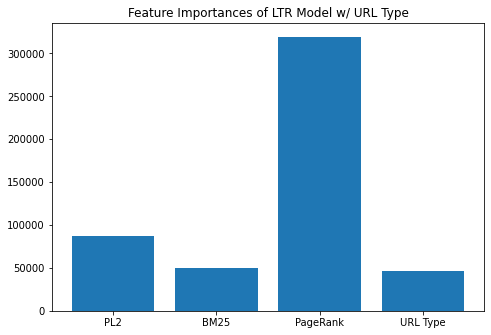

In [ ]:
# Create bar chart of feature importances for LTR + URL Type model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['PL2', 'BM25', 'PageRank', 'URL Type'], lmart_l3.feature_importances_)
ax.set_title("Feature Importances of LTR Model w/ URL Type")
fig.show()

### Significance of LTR + URL Slashes (as baseline) vs. LTR + URL Type (For question 32)

In [ ]:
# Run experiment of baseline LTR + URL Slashes vs. LTR + URL Type, using MAP
pt.Experiment([url_slash_lm_pipe, url_type_lm_pipe],
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (+ URL Slashes)", "LTR (+ URL Type)"],
              baseline=0)

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,LTR (+ URL Slashes),0.4296,NaN,NaN,NaN
1,LTR (+ URL Type),0.4853,21.0,23.0,0.056307


# Q3 Proximity Search Feature

Now you will implement a new query-dependent feature, using the MinDist() function, as discussed in the specification. Do carefully read the Exercise 2 specification before starting the implementation.

Hints:
 - Again, remember to use assertions to test your feature implementations.
 - Refer to the PyTerrier learning to rank documentation concerning features_importances_ for obtaining feature importances

As mentioned in the specification, you should implement a function called `avgmindist()`, which takes the text of the query and the text of the document, and returns a score for the document, i.e. it must conform to the following Python specification:
```python
def avgmindist(query : str, document : str) -> float
```

NB: There are particular specific requirements for your implementations of MinDist() and avgmindist() that are detailed in the specification.

In [ ]:
import string

#YOUR AVGMINDIST IMPLEMENTATION

# Define the MinDist function which calculates the min distance between
# two query terms in a document
# Parameters: a -> query term 1, b -> query term 2, doc -> the document
def mindist(a, b, doc):
  # Remove punctuation from document
  for char in string.punctuation:
    doc = doc.replace(char, '')

  # Set document to lowercase
  doc = doc.lower()

  # Tokenize document, splitting by whitespace
  doc_terms = doc.split(' ')

  # This dictionary will hold the term occurences by index for a and b
  term_occurs = {'a': [], 'b': []}

  # Iterate through the document, keeping track of term occurences
  for term in range(len(doc_terms)):
    # If the term is a
    if doc_terms[term] == a:
      # Add the index to 'a' occurrences
      term_occurs['a'].append(term)
    # If the term is b
    if doc_terms[term] == b:
      # Add the index to 'b' occurrences
      term_occurs['b'].append(term)

  # Intialize minimum distance as length of document
  min_dist = len(doc_terms)
  # Iterate through term occurrences of term a
  for o1 in term_occurs['a']:
    # Iterate through term occurrences of term b
    for o2 in term_occurs['b']:
      # If a occurs before b in the document
      # AND the terms are closer than the current min. distance
      if o1 < o2 and min_dist > (o2-(o1+1)):
        # Update minimum distance
        # NOTE: This is o2-(o1+1) because if term b occurs immediately following term a
        # then the distance should be 0, not 1.
        # Ex. 'white house' should be a dist. of 0 if a='white' and b='house'
        min_dist = o2-(o1+1)
      # Else If o2 occurs before o1 in the document
      # AND the terms are closer than the current min. distance
      elif o2 < o1 and min_dist > (o1-(o2+1)):
        # Update minimum distance
        min_dist = o1-(o2+1)

  # Return the minimum distance
  return min_dist

# Define the avgmindist function which calculates the average minimum distance
# between pairs of query terms in a document
# Parameters: query, document
# Returns a float
def avgmindist(query : str, document : str) -> float:
  # Remove punctuation from query
  for char in string.punctuation:
    query = query.replace(char, '')

  # Set query all to lowercase
  query = query.lower()

  # Split terms by whitespace
  all_terms = query.split(' ')
  # Number of pairs in query is length of query - 1
  pairs = len(all_terms) - 1
  # If query is longer than one term
  if pairs != 0:
    # Initialize sum of distance to 0
    sum_dist = 0
    # Iterate through query pairs
    for pair in range(pairs):
      # Call the dist function on the current pair of sequential query terms
      sum_dist += mindist(all_terms[pair], all_terms[pair+1], document)

    # If none of the pairs match, this value will be the document length since
    # all of the minimum distance calls will return the document length
    avg_min_dist = sum_dist/pairs
  # Else if query is one term long, there are naturally no pairs
  else:
    # Remove punctuation from document
    for char in string.punctuation:
      document = document.replace(char, '')

    # Tokenize document, splitting by whitespace
    doc_terms = document.split(' ')

    # Set average min distance to the length of the document
    avg_min_dist = len(doc_terms)

  # Return the average minimum distance
  return avg_min_dist

# Helper function to retrieve the query and the document body for each row
def avgmindist_helper(row):
  # Retrieve the docid and query for that row
  docid = row["docid"]
  query = row["query"]

  # Retrieve the document body
  doc = index.getMetaIndex().getItem('body', docid)
  # Call the avgmindist function
  amd = avgmindist(query, doc)

  # Return the avgmindist in numpy array (since that is what doc_features takes)
  return np.array([amd])

##### Test Cases for Avg. Min. Dist. #####

### Assertions for > 2 term queries ###
# Test that a three term query where document that has no pairs returns the maximum
# The length of the document is 9
# NOTE: This also demonstrates that punctuation is removed.
assert avgmindist("president united states", "Joe Biden is in charge of the executive branch.") == 9, "Should return 9"

# Test that a three term query where document has one pair returns the average of the pair distance and the maximum
# The pair distance is 0, the maximum is 6, should return 3
# NOTE: This also demonstrates that the function is case-insensitive
assert avgmindist("president united states", "Joe Biden oversees the United States.") == 3, "Should return 3"

# Test that a three term query where document has both pairs returns the average of the distances
# The pair distance of "president united" is 2, the distance of "united states" is 0, should return 1
assert avgmindist("president united states", "The United States elected president Joe Biden.") == 1, "Should return 1"

### Assertions for 2 term queries ###
# Test that a two term query where document only contains one term returns the maximum
# The length of the document is 9
assert avgmindist("Joe Biden", "The United States elected president Biden.") == 6, "Should return 6"

# Test that a two term query where document contains both terms 2 words apart returns 2
assert avgmindist("Joe Biden", "First name Joe, last name Biden.") == 2, "Should return 2"

# Test that a two term query where document contains both terms 2 words and 6 words apart returns 2
assert avgmindist("Joe Biden", "Biden has been elected president. First name Joe, last name Biden. ") == 2, "Should return 2"

# Test that a two term query where documents contains terms sequentially returns 0
assert avgmindist("Joe Biden", "The US has elected Joe Biden.") == 0, "Should return 0"

### Assertion for 1 term query ###
# Test that a one term query and a document returns the maximum avg_min_dist
# The length of the document is 6
assert avgmindist("Biden", "The US has elected Joe Biden.") == 6, "Should return 6"

### Assertion for no stopword removal ###
# Test that a query with stopwords will return the accurate distance (i.e. not remove the stopword)
assert avgmindist("that is", "Wow, that truly is amazing!") == 1, "Should return 1"



You should test your impementation yourself (your code must list the test cases you deployed to test that your feature works as expected). However, to also allow us to verify your implementation, we have created 9 testcases. Please run `run_test_cases()` and use its responses to answer the relevant quiz questions.

Hint:
 - Our test cases took around 1-3ms each. If the testing of your implementation takes magnitudes of time longer, then this will impact upon how long it takes you to train and evaluate your implementation within a LTR pipeline.


In [ ]:
#DO NOT ALTER THIS CELL
TEST_CASES = [
  ('fermilab directory', 45, 567257), #1
  ('webcam', 45, 567257), #2
  ('DOM surface', 384034, 388292), #3
  ('DOM surface', 45, 384034), #4
  ('DOM surface document', 388292, 384034), #5
  ('DOM software AMANDA', 639302, 384034), #6
  ('fermilab directory', 388292, 384034), #7
  ('trigger data', 596532, 639302), #8
  ('underlying hardware', 384034, 333649) #9
]

def run_test_cases():
  import datetime
  docno=0
  body=3
  for i, (query, docid1, docid2) in enumerate(TEST_CASES):
    start = datetime.datetime.now()
    meta1 = index.getMetaIndex().getAllItems(docid1)
    meta2 = index.getMetaIndex().getAllItems(docid2)
    s1 = avgmindist(query, meta1[body])
    s2 = avgmindist(query, meta2[body])
    if s1 > s2:
      result = meta1[docno]
      cmpD = "%s > %s" % (meta1[docno],meta2[docno])
    elif s2 > s1:
      result = meta2[docno]
      cmpD = "%s > %s" % (meta2[docno],meta1[docno])
    else:
      result = "EQUAL"
      cmpD = "%s == %s" % (meta1[docno],meta2[docno])
    end = datetime.datetime.now()
    print("TEST CASE %d result %s time %d ms" % (i+1, result, float((end-start).microseconds)/1000.))

run_test_cases()

TEST CASE 1 result G00-00-0478398 time 2 ms
TEST CASE 2 result G20-36-1335992 time 0 ms
TEST CASE 3 result G13-80-1271020 time 2 ms
TEST CASE 4 result G00-00-0478398 time 1 ms
TEST CASE 5 result G13-80-1271020 time 1 ms
TEST CASE 6 result G13-64-2457111 time 1 ms
TEST CASE 7 result G13-64-2457111 time 0 ms
TEST CASE 8 result G23-17-3674898 time 0 ms
TEST CASE 9 result G11-79-2454097 time 0 ms


You should now integrate your avgmindist() function into a new LTR model, and compare its MAP & P@5 performance to the LTR baseline. You can now answer the corresponding quiz questions.

In [ ]:
# Define a new LambdaMART variable, to distinguish from others
lmart_l4 = lgb.LGBMRanker(task="train",
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=100,
    max_bin=255,
    num_leaves=7,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[1, 3, 5, 10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=10)

# Define the avgmindistance pipeline which starts with PL2, applies the stdfeatures
# combined with the avgmindist feature, and then applies the learned model
avgmindist_pipe = firstpassUB >> (stdfeatures ** pt.apply.doc_features(avgmindist_helper)) >> pt.ltr.apply_learned_model(lmart_l4, form='ltr')
# Fit the pipeline to the training and validation data
avgmindist_pipe.fit(tr_topics, tr_qrels, va_topics, va_qrels)

BR(PL2):   0%|          | 0/96 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/96 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/54 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/54 [00:00<?, ?q/s]

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's ndcg@1: 0.148148
[2]	valid_0's ndcg@1: 0.203704
[3]	valid_0's ndcg@1: 0.333333
[4]	valid_0's ndcg@1: 0.37037
[5]	valid_0's ndcg@1: 0.388889
[6]	valid_0's ndcg@1: 0.388889
[7]	valid_0's ndcg@1: 0.388889
[8]	valid_0's ndcg@1: 0.407407
[9]	valid_0's ndcg@1: 0.407407
[10]	valid_0's ndcg@1: 0.425926


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 4 features (including AvgMinDist), using MAP
pt.Experiment([lmart_pipe, avgmindist_pipe],   # Baseline LTR , LTR + AvgMinDist
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (3 Features)", "LTR (+ AvgMinDist)"],
              baseline=0)   # Baseline is LTR w/ 3 features

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,LTR (3 Features),0.3579,NaN,NaN,NaN
1,LTR (+ AvgMinDist),0.3578,16.0,12.0,0.995357


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 4 features (including AvgMinDist), using P@5
pt.Experiment([lmart_pipe, avgmindist_pipe],   # Baseline LTR , LTR + AvgMinDist
              test_topics,
              test_qrels,
              ["P_5"],            # Note: Changed to P_5
              round={"P_5" : 4},
              names=["LTR (3 Features)", "LTR (+ AvgMinDist)"],
              baseline=0)   # Baseline is LTR w/ 3 features

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,LTR (3 Features),0.1013,NaN,NaN,NaN
1,LTR (+ AvgMinDist),0.0960,2.0,4.0,0.417879


# Q4 A 5-feature Learning-to-Rank Model

You will now experiment with the LightGBM LambdaMART technique where you include both your added features (URL Type and AvgMinDist) along with the 3 initial features inc initial PL2 candidate set (5 features in total).

You need to learn a *new* model when using your final selection of 5 features.

Evaluate the performance of your resulting LTR system in comparison to the LTR baseline and answer the quiz questions.

In [ ]:
# Define a new LambdaMART variable, to distinguish from others
lmart_l5 = lgb.LGBMRanker(task="train",
    min_data_in_leaf=1,
    min_sum_hessian_in_leaf=100,
    max_bin=255,
    num_leaves=7,
    objective="lambdarank",
    metric="ndcg",
    ndcg_eval_at=[1, 3, 5, 10],
    learning_rate= .1,
    importance_type="gain",
    num_iterations=10)

# Define the avgmindistance pipeline which starts with PL2, applies the stdfeatures
# combined with the avgmindist feature, and then applies the learned model
fivefeature_pipe = firstpassUB >> (stdfeatures ** pt.apply.doc_features(url_type) ** pt.apply.doc_features(avgmindist_helper)) >> pt.ltr.apply_learned_model(lmart_l5, form='ltr')
# Fit the pipeline to the training and validation data
fivefeature_pipe.fit(tr_topics, tr_qrels, va_topics, va_qrels)

BR(PL2):   0%|          | 0/96 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/96 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/54 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/54 [00:00<?, ?q/s]

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's ndcg@1: 0.166667
[2]	valid_0's ndcg@1: 0.296296
[3]	valid_0's ndcg@1: 0.407407
[4]	valid_0's ndcg@1: 0.444444
[5]	valid_0's ndcg@1: 0.537037
[6]	valid_0's ndcg@1: 0.518519
[7]	valid_0's ndcg@1: 0.518519
[8]	valid_0's ndcg@1: 0.555556
[9]	valid_0's ndcg@1: 0.574074
[10]	valid_0's ndcg@1: 0.574074


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 5 features, using MAP
pt.Experiment([lmart_pipe, fivefeature_pipe],   # Baseline LTR , LTR + URL Type + AvgMinDist
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (3 Features)", "LTR (5 Features)"],
              baseline=0)   # Baseline is LTR w/ 3 features

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,LTR (3 Features),0.3579,NaN,NaN,NaN
1,LTR (5 Features),0.4664,31.0,24.0,0.012455


In [ ]:
# Run experiment of baseline LTR (3 features) vs. LTR w/ 5 features, using P_5
pt.Experiment([lmart_pipe, fivefeature_pipe],   # Baseline LTR , LTR + URL Type + AvgMinDist
              test_topics,
              test_qrels,
              ["P_5"],            # Note: Changed to P_5
              round={"P_5" : 4},
              names=["LTR (3 Features)", "LTR (5 Features)"],
              baseline=0)   # Baseline is LTR w/ 3 features

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_5,P_5 +,P_5 -,P_5 p-value
0,LTR (3 Features),0.1013,NaN,NaN,NaN
1,LTR (5 Features),0.1360,13.0,4.0,0.026989


### Testing 5 Feature vs. 4 Feature (w/ AvgMinDist) and 4 Feature (w/ URL Type) for Question 48

In [ ]:
# Run experiment of baseline LTR (w/ AvgMinDist) vs. LTR w/ 5 features, using MAP
pt.Experiment([avgmindist_pipe, fivefeature_pipe],   # LTR + AvgMinDist , LTR + URL Type + AvgMinDist
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (+ AvgMinDist)", "LTR (5 Features)"],
              baseline=0)   # Baseline is LTR + AvgMinDist

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,LTR (+ AvgMinDist),0.3578,NaN,NaN,NaN
1,LTR (5 Features),0.4664,32.0,23.0,0.010956


In [ ]:
# Run experiment of baseline LTR (w/ URL Type) vs. LTR w/ 5 features, using MAP
pt.Experiment([url_type_lm_pipe, fivefeature_pipe],   # LTR + URL Type , LTR + URL Type + AvgMinDist
              test_topics,
              test_qrels,
              ["map"],
              round={"map" : 4},
              names=["LTR (+ URL Type)", "LTR (5 Features)"],
              baseline=0)   # Baseline is LTR + URL Type

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,map,map +,map -,map p-value
0,LTR (+ URL Type),0.4853,NaN,NaN,NaN
1,LTR (5 Features),0.4664,12.0,20.0,0.273718


### For Question 49...

In [ ]:
# Run experiment of LTR w/ 4 features (URL Type), using P_1
pt.Experiment([url_type_lm_pipe],   # LTR + URL Type
              test_topics,
              test_qrels,
              ["P_1"],            # Note: Changed to P_1
              round={"P_1" : 4},
              names=["LTR (+ URL Type)"])

BR(PL2):   0%|          | 0/75 [00:00<?, ?q/s]

FBR(3 features):   0%|          | 0/75 [00:00<?, ?q/s]

,name,P_1
0,LTR (+ URL Type),0.3867


# That's all Folks

**Submission Instructions:** Complete this notebook. All your answers to Exercise 2 must be submitted on the Exercise 2 Quiz instance on Moodle with your completed notebook (showing **both** your solutions and the results of their executions).


Your answers to the Quiz questions along with your .ipynb notebook file (showing code and outputs) must be submitted by the stated Exercise 2 deadline.